In [1]:
#Import the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [2]:
#Due to the upload limitations I did not upload the dataset.If you want to train the model agian you should download the dataset from kaggle 
#and put it to the main directory. Also do not forget the change directory on main.ipynb file for "directory" variable.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        directory = r"chest_xray/chest_xray/train/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        directory = r"chest_xray/chest_xray/test/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 624 images belonging to 2 classes.


In [4]:
validation = ImageDataGenerator(rescale=1./255)
vall = test_datagen.flow_from_directory(
        directory = r"chest_xray/chest_xray/val/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 16 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [6]:

model.add(tf.keras.layers.Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' ))
model.add(keras.Input(shape=(64, 64, 3)))

In [7]:
model.add(tf.keras.layers.MaxPool2D( pool_size = 2 , strides = 2))

In [8]:
model.add(tf.keras.layers.Flatten())

In [9]:
model.add(tf.keras.layers.Dense(units = 128 , activation = 'relu'))

In [10]:
model.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
history= model.fit(x = training_set , validation_data = vall , epochs = 25)

Epoch 1/25


2023-06-04 11:29:12.202554: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


163/163 [==============================] - 32s 192ms/step - loss: 0.3421 - accuracy: 0.8599 - val_loss: 0.3599 - val_accuracy: 0.7500
Epoch 2/25
163/163 [==============================] - 29s 180ms/step - loss: 0.2342 - accuracy: 0.9055 - val_loss: 0.3381 - val_accuracy: 0.8750
Epoch 3/25
163/163 [==============================] - 30s 184ms/step - loss: 0.2046 - accuracy: 0.9185 - val_loss: 0.4642 - val_accuracy: 0.7500
Epoch 4/25
163/163 [==============================] - 29s 179ms/step - loss: 0.1920 - accuracy: 0.9256 - val_loss: 1.0028 - val_accuracy: 0.6250
Epoch 5/25
163/163 [==============================] - 29s 179ms/step - loss: 0.1688 - accuracy: 0.9331 - val_loss: 0.4923 - val_accuracy: 0.7500
Epoch 6/25
163/163 [==============================] - 30s 181ms/step - loss: 0.1595 - accuracy: 0.9381 - val_loss: 0.4082 - val_accuracy: 0.7500
Epoch 7/25
163/163 [==============================] - 29s 181ms/step - loss: 0.1668 - accuracy: 0.9329 - val_loss: 0.3282 - val_accuracy: 0.8

In [13]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print("The accuracy of the model is:")
print(test_acc)


20/20 - 3s - loss: 0.7074 - accuracy: 0.8510 - 3s/epoch - 133ms/step
The accuracy of the model is:
0.8509615659713745


1/1 [==============================] - 0s 93ms/step
Negative


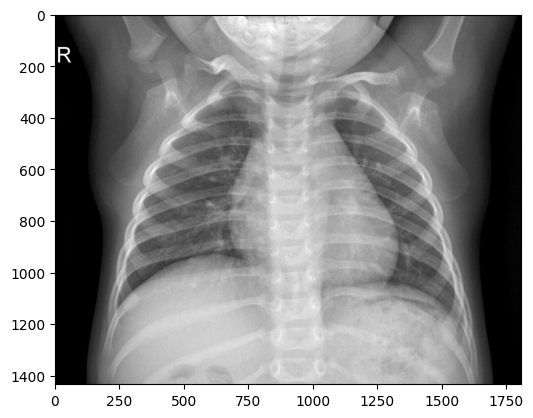

In [14]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
import matplotlib.image as img
import tensorflow as tf
model = tf.keras.models.load_model('model')
path = 'chest_xray/chest_xray/train/NORMAL/IM-0119-0001.jpeg'
test_image = tf.keras.utils.load_img(path, target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'Negative'
else:
  prediction = 'Positive'


image = img.imread(path)
plt.imshow(image, cmap='gray')


print(prediction)

In [ ]:
model.save('model')